In [30]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# hate_crime = pd.read_csv('hate_crime.csv', infer_datetime_format=True, 
#                          parse_dates=['INCIDENT_DATE'],low_memory=False)

hate_crime = pd.read_csv('hate_crime.csv',low_memory=False)

In [3]:
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

In [4]:
hate_crime['INCIDENT_COUNT']=1
ts_df = hate_crime[['INCIDENT_DATE', 'INCIDENT_COUNT']]

In [5]:
# ts_df["INCIDENT_DATE"] = pd.to_datetime(ts_df["INCIDENT_DATE"], format='%Y-%m').apply(lambda x: dt.strptime(x,'%Y-%m'))
# ts_df

# ts_df["INCIDENT_DATE"] = ts_df["INCIDENT_DATE"].apply(lambda x: dt.strptime(x,'%Y-%m'))
# ts_df


ts_df['INCIDENT_MONTH'] = pd.to_datetime(ts_df['INCIDENT_DATE']).dt.to_period('M')

print(ts_df.dtypes)
ts_df.drop('INCIDENT_DATE', axis=1, inplace=True)
ts_df.head(3)

INCIDENT_DATE        object
INCIDENT_COUNT        int64
INCIDENT_MONTH    period[M]
dtype: object


C:\Users\aspen\AppData\Local\Temp/ipykernel_14448/176715545.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['INCIDENT_MONTH'] = pd.to_datetime(ts_df['INCIDENT_DATE']).dt.to_period('M')
C:\Users\aspen\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,INCIDENT_COUNT,INCIDENT_MONTH
0,1,1991-08
1,1,1991-09
2,1,1991-07


In [6]:
ts_df['INCIDENT_MONTH'] = ts_df['INCIDENT_MONTH'].apply(lambda x: x.to_timestamp(freq='M'))

print(ts_df.dtypes)
ts_df

# time_series_df = time_series_df[['INCIDENT_MONTH', 'STATE_ABBR', 'INCIDENT_COUNT']]
# time_series_df = time_series_df.groupby(['INCIDENT_MONTH', 'STATE_ABBR'])['INCIDENT_COUNT'].sum().reset_index()
# time_series_df



# >>> '{:%Y-%m}'.format(dt.strptime('2016-07-31', '%Y-%m-%d'))
# '2016-07'

# >>> date = '2016-07-31'
# >>> date[:-3]
# '2016-07'
# >>> date[:date.rfind('-')]
# '2016-07'

INCIDENT_COUNT             int64
INCIDENT_MONTH    datetime64[ns]
dtype: object


C:\Users\aspen\AppData\Local\Temp/ipykernel_14448/2932108906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['INCIDENT_MONTH'] = ts_df['INCIDENT_MONTH'].apply(lambda x: x.to_timestamp(freq='M'))


,INCIDENT_COUNT,INCIDENT_MONTH
0,1,1991-08-31
1,1,1991-09-30
2,1,1991-07-31
3,1,1991-12-31
4,1,1991-12-31
...,...,...
219572,1,2020-11-30
219573,1,2020-07-31
219574,1,2020-10-31
219575,1,2020-01-31


In [7]:
ts_df = ts_df.groupby(['INCIDENT_MONTH'])['INCIDENT_COUNT'].sum().reset_index()

indexed_df = ts_df.set_index('INCIDENT_MONTH')
indexed_df

,INCIDENT_COUNT
INCIDENT_MONTH,
1991-01-31,302
1991-02-28,287
1991-03-31,287
1991-04-30,309
1991-05-31,371
...,...
2020-08-31,1085
2020-09-30,952
2020-10-31,1004


In [8]:
ts_df.index.dtype

dtype('int64')

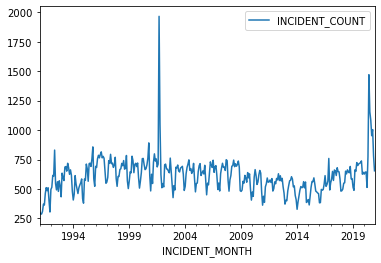

,INCIDENT_COUNT
INCIDENT_MONTH,
2001-09-30,1966
2001-10-31,1048
2020-06-30,1470
2020-07-31,1155
2020-08-31,1085
2020-10-31,1004


In [14]:
# plt.plot(indexed_df['INCIDENT_MONTH'], indexed_df['INCIDENT_COUNT'])
# plt.show()

indexed_df.plot()
plt.show()

indexed_df[indexed_df['INCIDENT_COUNT'] > 1000]

### Timeseries Analysis
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling

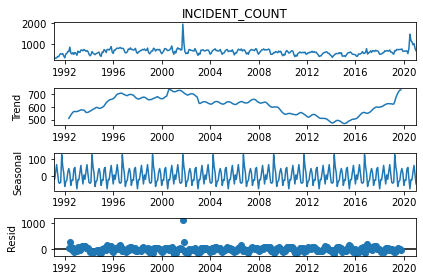

In [17]:
decompose_data = seasonal_decompose(indexed_df['INCIDENT_COUNT'], period=30)

decompose_plot = decompose_data.plot()

## trend is not consistent
##variation in residuals mostly accounted for in 2001 spike

<AxesSubplot:xlabel='INCIDENT_MONTH'>

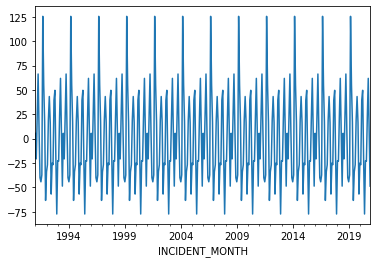

In [18]:
#inspect seasonality
seasonality = decompose_data.seasonal
seasonality.plot()

In [19]:
#Augmented Dickey Fuller test

dftest = adfuller(indexed_df.INCIDENT_COUNT, autolag = 'AIC')
print("ADF: ",dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num Of Observations:", dftest[3])
print("Critical Values:")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
    
## p-value is high, well above threshold of 0.05
##dataset is non-stationary

ADF:  -2.0917595135766973
P-Value:  0.24784102700270688
Num Of Lags:  14
Num Of Observations: 345
Critical Values:
	 1% :  -3.4494474563375737
	 5% :  -2.8699542285903887
	 10% :  -2.5712527305187987


<AxesSubplot:title={'center':'original'}, xlabel='INCIDENT_MONTH'>

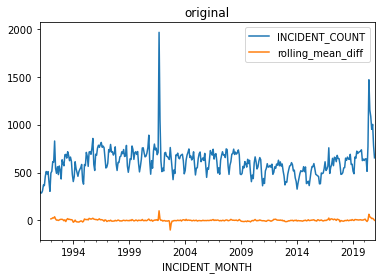

In [21]:
## use rolling mean as differencing method to impose stationarity

rolling_mean = indexed_df['INCIDENT_COUNT'].rolling(window = 12).mean()
indexed_df['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

#plot original df and rolling mean difference together
indexed_df[['INCIDENT_COUNT', 'rolling_mean_diff']].plot(title='original')

In [22]:
#perform Augmented Dickey Fuller Test again on rolling_mean_diff

dftest = adfuller(indexed_df['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("ADF: ",dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num Of Observations:", dftest[3])
print("Critical Values:")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
    
## p value is much lower than 0.05 now; stationarity has been corrected

ADF:  -5.707662573429253
P-Value:  7.423714163556169e-07
Num Of Lags:  12
Num Of Observations: 335
Critical Values:
	 1% :  -3.4500219858626227
	 5% :  -2.870206553997666
	 10% :  -2.571387268879483


### ARIMA

In [27]:
#p = lags in the autoregresive model
p = 5
#d = differencing / integration order
d = 1
#q = moving average lags
q = 4

my_order=(p,d,q)

model = ARIMA(indexed_df['INCIDENT_COUNT'], order=my_order)
results = model.fit()
results.summary()

C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Like

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         INCIDENT_COUNT   No. Observations:                  360
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -2198.718
Date:                Sat, 05 Mar 2022   AIC                           4417.436
Time:                        15:01:40   BIC                           4456.270
Sample:                    01-31-1991   HQIC                          4432.879
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3700      0.131    -10.430      0.000      -1.627      -1.113
ar.L2         -0.8459      0.193     -4.382      0.000      -1.224      -0.468
ar.L3         -0.0431      0.170     -0.253      0.800      -0.376       0.290
ar.L4          0.2645      0.131      2.020      0.043       0.008       0.521
ar.L5         -0.1466      0.062     -2.358      0.018      -0.268      -0.025
ma.L1          1.0110      0.135      7.476      0.000       0.746       1.276
ma.L2          0.0442      0.143      0.310      0.757      -0.235       0.324
ma.L3         -0.7966      0.134     -5.948      0.000      -1.059      -0.534
ma.L4         -0.7835      0.117     -6.687      0.000      -1.013      -0.554
sigma2      1.181e+04    322.859     36.578      0.000    1.12e+04    1.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             36116.16
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             4.44
Prob(H) (two-sided):                  0.13   Kurtosis:                        51.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='INCIDENT_MONTH'>

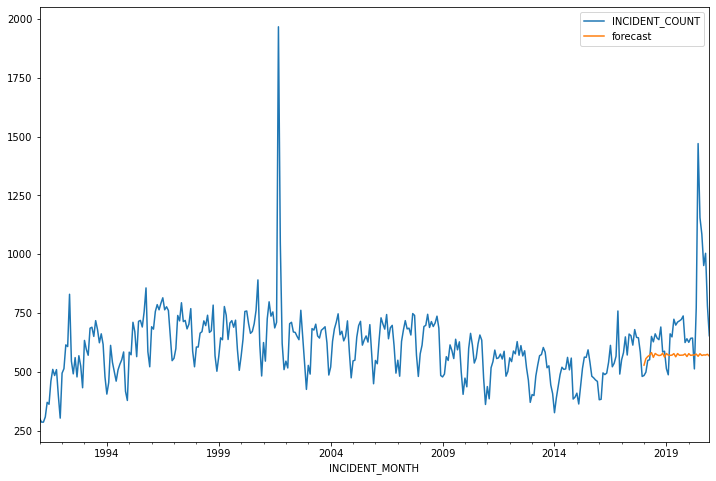

In [28]:
indexed_df['forecast'] = results.predict(start='2018-01', end='2020-12', dynamic=True)
indexed_df[['INCIDENT_COUNT', 'forecast']].plot(figsize=(12,8))

### SARIMAX

In [43]:
model = SARIMAX(indexed_df['INCIDENT_COUNT'], order=my_order, seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\aspen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='INCIDENT_MONTH'>

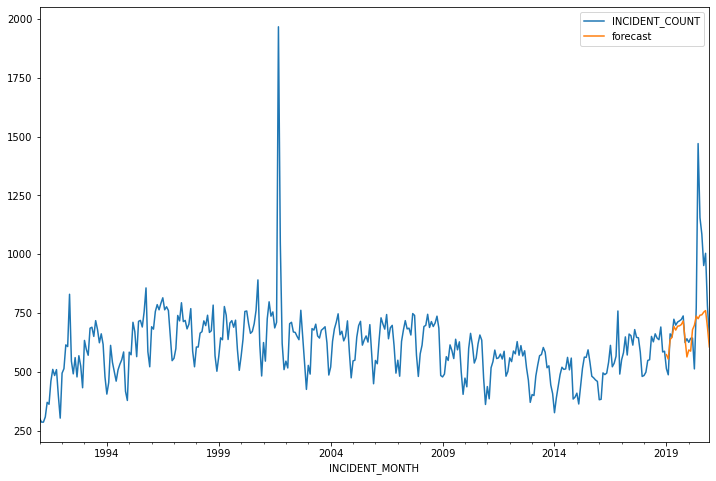

In [36]:
indexed_df['forecast']=results.predict(start='2019-01',end='2020-12',dynamic=True)
indexed_df[['INCIDENT_COUNT','forecast']].plot(figsize=(12,8))

### Timeseries Analysis as Supervised Learning
https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56

In [46]:
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

In [51]:
ml_df = hate_crime[['INCIDENT_DATE', 'INCIDENT_COUNT', 'STATE_ABBR', 'REGION_NAME', 'POPULATION_GROUP_CODE', 
                    'VICTIM_COUNT', 'BIAS_DESC', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENSE_NAME']]
ml_df.head(3)

,INCIDENT_DATE,INCIDENT_COUNT,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,VICTIM_COUNT,BIAS_DESC,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,OFFENSE_NAME
0,31-AUG-91,1,AR,South,5,1,Anti-Black or African American,1,White,Intimidation
1,19-SEP-91,1,AR,South,6,1,Anti-White,1,Black or African American,Simple Assault
2,04-JUL-91,1,AR,South,3,1,Anti-Black or African American,1,Black or African American,Aggravated Assault


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action=’ignore’, 
 suppress_warnings=True, 
 stepwise=True)